In [59]:
import pandas as pd

1. Lisez votre ensemble de données Titanic comme d'habitude : créez un ensemble d'apprentissage et un ensemble de test, puis appliquez l'arbre de décision. 

In [60]:


# Load the Titanic dataset
titanic = pd.read_csv("titanic-passangers.csv",sep=",")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Donnees manquantes 

In [61]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Nettoyage de donnees 

In [62]:

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()) 

In [63]:
titanic['Sex']=titanic['Sex'].replace({"female":0,"male":1})

In [64]:

titanic.dropna(axis= 0, subset=['Embarked'] ,inplace=True) 

In [65]:
titanic['Titre']= titanic['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titre
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
# Créer un classificateur à arbre de décision
X = titanic[["Pclass", "Age", "Sex","SibSp"]]
y = titanic["Survived"]

# Divisez les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tree = DecisionTreeClassifier()

# faire pleuvoir le classifieur sur les données d'entraînement
tree.fit(X_train, y_train)

# Utilisez le classificateur pour faire des prédictions sur les données de test.
predictions = tree.predict(X_test)

# Évaluer la performance du classificateur
accuracy = accuracy_score(y_test, predictions)*100
print("Precision : {:.4} %".format(accuracy))




Precision : 82.51 %


2. Tracez votre arbre de décision et essayez de lire les branches de l'arbre et de conclure une prédiction manuellement.

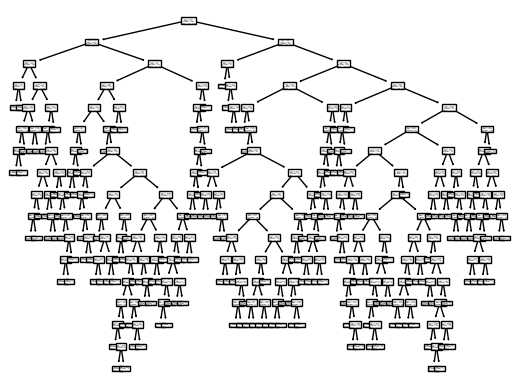

In [69]:
from sklearn import tree
import matplotlib.pyplot as plt

# Créer le classificateur d'arbre de décision
clf = tree.DecisionTreeClassifier()
# 
clf = clf.fit(X, y)
# Plot the decision tree
plt.figure()
tree.plot_tree(clf)
plt.show()







3. Modifiez les paramètres de l'arbre de décision (au moins deux paramètres). 


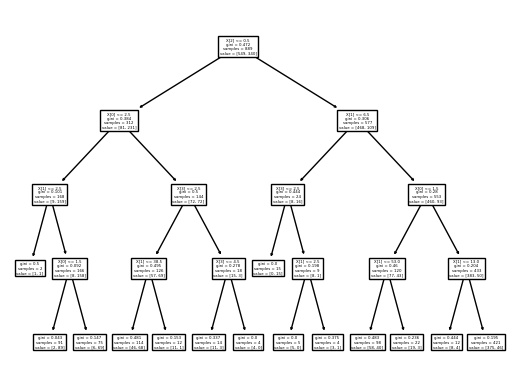

In [70]:

# Créez le classificateur d'arbre de décision, en spécifiant différentes
#  valeurs pour les paramètres 'max_depth' et 'min_samples_leaf'.
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

# Train the classifier on the data
clf = clf.fit(X, y)

# Plot the decision tree
plt.figure()
tree.plot_tree(clf)
plt.show()



4. Calculez la nouvelle précision et comparez-la avec les résultats précédents. 

In [71]:
from sklearn.metrics import precision_score

In [79]:
predictions = clf.predict(X)
precision = precision_score(y, predictions)*100

# Print the precision
print("Nouvelle precision {}".format(precision)) 
if (accuracy>precision):
    print(f"La première précision {accuracy} est plus performante la nouvelle {precision} ")
else:
    print(f"La nouvelle précision {precision} est plus performante la  première {accuracy} ")


Nouvelle precision 90.25157232704403
La nouvelle précision 90.25157232704403 est plus performante la  première 82.51121076233184 


 5.Utilisez une forêt aléatoire puis changez le nombre d'estimateurs.

In [103]:
# Importation des libreries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


# Créez le classificateur de forêt aléatoire, en spécifiant le nombre d'estimateurs.
clf = RandomForestClassifier(n_estimators=100)

# entrainer le  classifier 
clf = clf.fit(X, y)


# Faire des prédictions sur les données d'apprentissage en utilisant le classificateur formé.
predictions = clf.predict(  X)

# Calcul de la  precision 
precision_1 = precision_score(y, predictions)*100

# Print the precision
print(precision_1,"%" )


89.96865203761756 %


6. Calculez la nouvelle précision et comparez-la avec le résultat précédent.

In [104]:
clf = RandomForestClassifier(n_estimators=200)

# Train the classifier on the data
clf = clf.fit(X, y)

# Faire des prédictions sur les données d'apprentissage en utilisant le classificateur formé.
predictions = clf.predict(X)

# Calculez la précision du classificateur sur les données d'apprentissage.
precision_2= precision_score(y, predictions)*100

# Print the precision
print(precision_2,"%")

if (precision_1>precision_2):
    print(f"La première précision {round(precision_1,3)} % est plus performante la nouvelle {round(precision_2,3)} %")
else:
    print(f"La nouvelle précision {round(precision_2,3)} % est plus performante la  précédante {round(precision_1,3)} %")

90.50632911392405 %
La nouvelle précision 90.506 % est plus performante la  précédante 89.969 %
